<a href="https://colab.research.google.com/github/dcolinmorgan/saturn_neurIPS/blob/main/neurIPS2021.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [98]:
# !curl "https://awscli.amazonaws.com/awscli-exe-linux-x86_64.zip" -o "awscliv2.zip"
# !unzip awscliv2.zip
# !sudo ./aws/install
!aws s3 sync s3://openproblems-bio/public/ $HOME/data/ --no-sign-request
!cp -r ~/data/* /content/drive/MyDrive/
# !wget https://github.com/openproblems-bio/neurips2021_multimodal_viash/releases/latest/download/starter_kit-match_modality-python.zip
# !unzip starter_kit-match_modality-python.zip kit/

In [ ]:
# !pip install anndata
import anndata as ad
import numpy as np
import pandas as pd
import logging
from sklearn.decomposition import TruncatedSVD
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
# !pip install scanpy
import scanpy as sc
import anndata as ad
import matplotlib.pyplot as plt
from matplotlib.pyplot import rc_context
!pip3 install leidenalg

GEX > ATAC

In [112]:
train_GEX1 = ad.read_h5ad("/content/drive/MyDrive/hku/neurIPS2021/phase1-data/match_modality/openproblems_bmmc_multiome_phase1_rna/openproblems_bmmc_multiome_phase1_rna.censor_dataset.output_train_mod1.h5ad")
train_ATAC1 = ad.read_h5ad("/content/drive/MyDrive/hku/neurIPS2021/phase1-data/match_modality/openproblems_bmmc_multiome_phase1_rna/openproblems_bmmc_multiome_phase1_rna.censor_dataset.output_train_mod2.h5ad")
train_match1 = ad.read_h5ad("/content/drive/MyDrive/hku/neurIPS2021/phase1-data/match_modality/openproblems_bmmc_multiome_phase1_rna/openproblems_bmmc_multiome_phase1_rna.censor_dataset.output_train_sol.h5ad")
print([train_GEX1.shape,train_ATAC1.shape,train_match1.shape])
test_GEX1 = ad.read_h5ad("/content/drive/MyDrive/hku/neurIPS2021/phase1-data/match_modality/openproblems_bmmc_multiome_phase1_rna/openproblems_bmmc_multiome_phase1_rna.censor_dataset.output_test_mod1.h5ad")
test_ATAC1 = ad.read_h5ad("/content/drive/MyDrive/hku/neurIPS2021/phase1-data/match_modality/openproblems_bmmc_multiome_phase1_rna/openproblems_bmmc_multiome_phase1_rna.censor_dataset.output_test_mod2.h5ad")
test_match1 = ad.read_h5ad("/content/drive/MyDrive/hku/neurIPS2021/phase1-data/match_modality/openproblems_bmmc_multiome_phase1_rna/openproblems_bmmc_multiome_phase1_rna.censor_dataset.output_test_sol.h5ad")
print([test_GEX1.shape,test_ATAC1.shape,test_match1.shape])

[(16394, 13431), (16394, 116490), (16394, 16394)]
[(6069, 13431), (6069, 116490), (6069, 6069)]


In [122]:
sc.tl.pca(train_GEX1, svd_solver='arpack')
# sc.pl.pca(train_GEX1, color='CST3')
sc.pl.pca_variance_ratio(train_GEX1, log=True)

In [161]:
train_GEX1.var[train_GEX1.var.index=='NOC2L']

,gene_ids,feature_types,n_cells,mt,n_cells_by_counts,mean_counts,pct_dropout_by_counts,total_counts
NOC2L,ENSG00000188976,GEX,925,False,925,0.045766,94.357692,750.295959


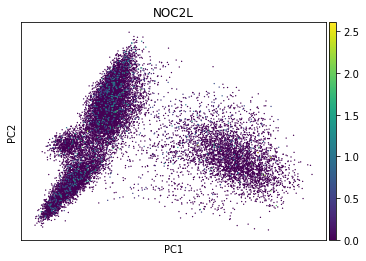

In [150]:
sc.pl.pca(train_GEX1, color='NOC2L')

In [ ]:
sc.pp.neighbors(train_GEX1, n_neighbors=10, n_pcs=40)
# sc.tl.paga(train_GEX1)
# sc.pl.paga(train_GEX1, plot=False)  # remove `plot=False` if you want to see the coarse-grained graph
# sc.tl.umap(train_GEX1, init_pos='paga')
sc.tl.umap(train_GEX1)
sc.pl.umap(train_GEX1, color=['CST3', 'NKG7', 'NOC2L'], use_raw=False)

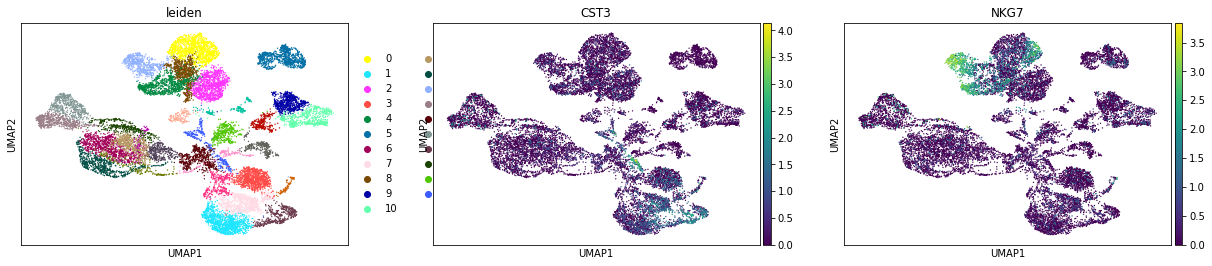

In [166]:
sc.tl.leiden(train_GEX1)
sc.pl.umap(train_GEX1, color=['leiden', 'CST3', 'NKG7'])

In [ ]:
sc.tl.rank_genes_groups(train_GEX1, 'leiden', method='t-test')
sc.pl.rank_genes_groups(train_GEX1, n_genes=25, sharey=False)

In [ ]:
sc.tl.rank_genes_groups(train_GEX1, 'leiden', method='wilcoxon')
sc.pl.rank_genes_groups(train_GEX1, n_genes=25, sharey=False)

In [ ]:
sc.tl.rank_genes_groups(train_GEX1, 'leiden', method='logreg')
sc.pl.rank_genes_groups(train_GEX1, n_genes=25, sharey=False)

In [199]:
train_GEX1.var.index[train_GEX1.obs.leiden=5]

SyntaxError: ignored

In [197]:
train_GEX1.obs.leiden

TAGTTGTCACCCTCAC-1-s1d1    10
CTATGGCCATAACGGG-1-s1d1     7
CCGCACACAGGTTAAA-1-s1d1     8
TCATTTGGTAATGGAA-1-s1d1     4
ACCACATAGGTGTCCA-1-s1d1    17
                           ..
TAGTAAGCAACTAGGG-8-s3d6    28
TGGTCCTTCGGCTAGC-8-s3d6     5
CGCTTGCGTTGTTGGA-8-s3d6    26
ACCCTCCCAGCCAGTT-8-s3d6     5
AGTGAACCATCCCGCT-8-s3d6     5
Name: leiden, Length: 16394, dtype: category
Categories (31, object): ['0', '1', '2', '3', ..., '27', '28', '29', '30']

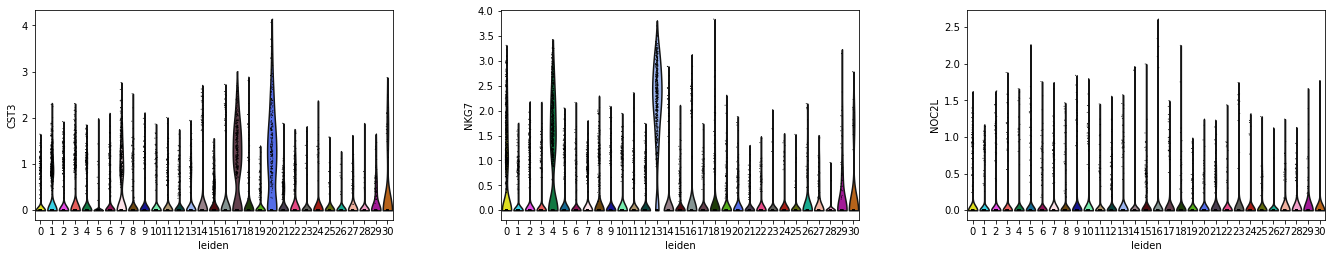

In [170]:
sc.pl.violin(train_GEX1, ['CST3', 'NKG7', 'NOC2L'], groupby='leiden')

In [171]:
sc.pl.dotplot(train_GEX1, marker_genes, groupby='leiden');

NameError: ignored

In [ ]:
train_ATAC1.var

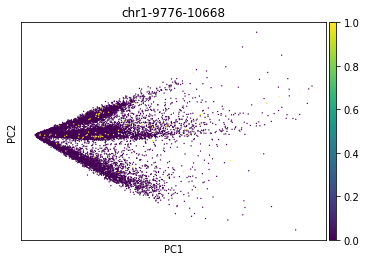

In [143]:
# sc.tl.pca(train_ATAC1, svd_solver='arpack')
sc.pl.pca(train_ATAC1,color='chr1-9776-10668')

ATAC > GEX

In [ ]:
train_ATAC2 = ad.read_h5ad("/content/drive/MyDrive/hku/neurIPS2021/phase1-data/match_modality/openproblems_bmmc_multiome_phase1_mod2/openproblems_bmmc_multiome_phase1_mod2.censor_dataset.output_train_mod1.h5ad")
train_GEX2 = ad.read_h5ad("/content/drive/MyDrive/hku/neurIPS2021/phase1-data/match_modality/openproblems_bmmc_multiome_phase1_mod2/openproblems_bmmc_multiome_phase1_mod2.censor_dataset.output_train_mod2.h5ad")
train_match2 = ad.read_h5ad("/content/drive/MyDrive/hku/neurIPS2021/phase1-data/match_modality/openproblems_bmmc_multiome_phase1_mod2/openproblems_bmmc_multiome_phase1_mod2.censor_dataset.output_train_sol.h5ad")
print([train_ATAC2.shape,train_GEX2.shape,train_match2.shape])
test_ATAC2 = ad.read_h5ad("/content/drive/MyDrive/hku/neurIPS2021/phase1-data/match_modality/openproblems_bmmc_multiome_phase1_mod2/openproblems_bmmc_multiome_phase1_mod2.censor_dataset.output_test_mod1.h5ad")
test_GEX2 = ad.read_h5ad("/content/drive/MyDrive/hku/neurIPS2021/phase1-data/match_modality/openproblems_bmmc_multiome_phase1_mod2/openproblems_bmmc_multiome_phase1_mod2.censor_dataset.output_test_mod2.h5ad")
test_match2 = ad.read_h5ad("/content/drive/MyDrive/hku/neurIPS2021/phase1-data/match_modality/openproblems_bmmc_multiome_phase1_mod2/openproblems_bmmc_multiome_phase1_mod2.censor_dataset.output_test_sol.h5ad")
print([test_ATAC2.shape,test_GEX2.shape,test_match2.shape])


GEX > ADT

In [ ]:
train_GEX3 = ad.read_h5ad("/content/drive/MyDrive/hku/neurIPS2021/phase1-data/match_modality/openproblems_bmmc_cite_phase1_rna/openproblems_bmmc_cite_phase1_rna.censor_dataset.output_train_mod1.h5ad")
train_ADT3 = ad.read_h5ad("/content/drive/MyDrive/hku/neurIPS2021/phase1-data/match_modality/openproblems_bmmc_cite_phase1_rna/openproblems_bmmc_cite_phase1_rna.censor_dataset.output_train_mod2.h5ad")
train_match3 = ad.read_h5ad("/content/drive/MyDrive/hku/neurIPS2021/phase1-data/match_modality/openproblems_bmmc_cite_phase1_rna/openproblems_bmmc_cite_phase1_rna.censor_dataset.output_train_sol.h5ad")
print([train_GEX3.shape,train_ADT3.shape,train_match3.shape])
test_GEX3 = ad.read_h5ad("//content/drive/MyDrive/hku/neurIPS2021/phase1-data/match_modality/openproblems_bmmc_cite_phase1_rna/openproblems_bmmc_cite_phase1_rna.censor_dataset.output_train_mod1.h5ad")
test_ADT3 = ad.read_h5ad("/content/drive/MyDrive/hku/neurIPS2021/phase1-data/match_modality/openproblems_bmmc_cite_phase1_rna/openproblems_bmmc_cite_phase1_rna.censor_dataset.output_train_mod2.h5ad")
test_match3 = ad.read_h5ad("/content/drive/MyDrive/hku/neurIPS2021/phase1-data/match_modality/openproblems_bmmc_cite_phase1_rna/openproblems_bmmc_cite_phase1_rna.censor_dataset.output_train_sol.h5ad")
print([test_GEX3.shape,test_ADT3.shape,test_match3.shape])


ADT > GEX

In [ ]:
train_ADT4 = ad.read_h5ad("/content/drive/MyDrive/hku/neurIPS2021/phase1-data/match_modality/openproblems_bmmc_cite_phase1_mod2/openproblems_bmmc_cite_phase1_mod2.censor_dataset.output_test_mod1.h5ad")
train_GEX4 = ad.read_h5ad("/content/drive/MyDrive/hku/neurIPS2021/phase1-data/match_modality/openproblems_bmmc_cite_phase1_mod2/openproblems_bmmc_cite_phase1_mod2.censor_dataset.output_test_mod2.h5ad")
train_match4 = ad.read_h5ad("/content/drive/MyDrive/hku/neurIPS2021/phase1-data/match_modality/openproblems_bmmc_cite_phase1_mod2/openproblems_bmmc_cite_phase1_mod2.censor_dataset.output_test_sol.h5ad")
print([train_ADT4.shape,train_GEX4.shape,train_match4.shape])
test_ADT4 = ad.read_h5ad("/content/drive/MyDrive/hku/neurIPS2021/phase1-data/match_modality/openproblems_bmmc_cite_phase1_mod2/openproblems_bmmc_cite_phase1_mod2.censor_dataset.output_test_mod1.h5ad")
test_GEX4 = ad.read_h5ad("/content/drive/MyDrive/hku/neurIPS2021/phase1-data/match_modality/openproblems_bmmc_cite_phase1_mod2/openproblems_bmmc_cite_phase1_mod2.censor_dataset.output_test_mod2.h5ad")
test_match4 = ad.read_h5ad("/content/drive/MyDrive/hku/neurIPS2021/phase1-data/match_modality/openproblems_bmmc_cite_phase1_mod2/openproblems_bmmc_cite_phase1_mod2.censor_dataset.output_test_sol.h5ad")
print([test_ADT4.shape,test_GEX4.shape,test_match4.shape])
